# Women and children first? An exploratory data analysis of the Titanic's casualties

"Women and children first" is a code of conduct whereby the lives of women and children are to be saved first in a life-threatening situation. However a study by study the Uppsala University in 2012, that makes a reviews 19th-century shipwreck narratives does not find strong evidence for this to be the case. Based on that premise, this notebook consists of a descriptive analysis of the Kaggle's Titanic Dataset trying to offer some insights to solve the following question: "Were women and children more likely to survive than males?"

## Basic settings and reading the data 
The first step was to import the libraries needed for the analysis:

In [3]:
# Import the libraries that will be used during the analysis
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

Secondly, I decided to establish some basic settings for the visualizations:

In [4]:
# General settings for the visualizations
sns.set(context = 'notebook', style = 'whitegrid', rc = {'axes.grid': False, 
                                                         'grid.color': '1',
                                                         'text.color': '.2',
                                                         'legend.frameon': True,
                                                         'axes.axisbelow': True,
                                                         'axes.edgecolor': '.8',
                                                         'axes.facecolor': 'white',
                                                         'axes.grid': False,
                                                         'axes.labelcolor': '.4',
                                                         'axes.linewidth': 1.0,
                                                         'xtick.color': '.4',
                                                         'ytick.color': '.4'})
sns.set_palette(["#1b85b8", "#5a5255", "#559e83", "#ae5a41", "#c3cb71"])
%matplotlib inline

Next, I read the *.csv* file and took a look at the variables that composed it and the descriptions available for the them in Kaggle:

In [5]:
# Read the dataset
titanic_df = pd.read_csv('titanic_data.csv')

# Variables and their corresponding data types
titanic_dtypes = titanic_df.dtypes # Shown in the table below 

The dataset included the following 12 variables with their respective description and data type:

 Variable   | Description          | Type
------------|----------------------|-------------
PassengerId |    Passenger internal ID number | int64
Survived    |    Survival (0 = No; 1 = Yes) | int64
Pclass      |    Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) | int64
Name        |    Name | object
Sex         |    Sex | object
Age         |    Age | float64
Sibsp       |    Number of Siblings/Spouses Aboard | int64
Parch       |    Number of Parents/Children Aboard | int64
Ticket      |    Ticket Number | object
Fare        |    Passenger Fare |float64
Cabin       |    Cabin | object
Embarked    |    Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) | object

## Data filtering and summary statistics

Once the data was read I did some cleaning of it. First, based on the questions presented previously there were some variables that I decided to left out as they were not relevant for the analysis. The variables kept were the following 7: *Survived, Pclass, Sex, Age, SibSp, Parch and Fare*.

In [6]:
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

After that, I decided to take a look at the structure of the dataset by counting the number of observations (rows), looking at the first and last rows of the dataset (to see if the data was read correctly) and generating summary statistics of the numerical variables (including their correlations):

In [7]:
# Number of rows of the dataset
titanic_df.shape

(891, 7)

In [8]:
# Top of the dataset
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
# Bottom of the dataset
titanic_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
886,0,2,male,27.0,0,0,13.00
887,1,1,female,19.0,0,0,30.00
888,0,3,female,NaN,1,2,23.45
889,1,1,male,26.0,0,0,30.00
890,0,3,male,32.0,0,0,7.75


In [109]:
# Summary statistics of the numerical variables
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
# Correlations of the numerical variables
titanic_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Some first observations from the sample statistics were made:

- 38.38% of the passengers survived the shipwreck
- The average age of the passengers was of 29.70 years, with a standard deviation of 14.53 years. The oldest person had 80 years and the youngest 5 months.
- The passengers paid an average fare paid of 32.20 pounds with a standard deviation of 49.69 pounds. The cheapest fare paid was 0 pounds -which makes an interesting thing to look at in the next sections- and the highest fare paid was of 512.33 pounds.
- A numerous amount of passengers doesn't have their age reported

Next, I decided to take a look at the number of null values to see how relevant was its impact.

In [11]:
# Check for NaN values in the dataset
titanic_df.isnull().sum().to_frame().rename(columns={0: 'NaN Count'})

,NaN Count
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


As expected the only variable that had null values was the age. It contained 177 null values out of 891 observations, a quite large number. I decided to remove those observations when doing the analysis that involved using that variable. But chose not to do it on analysis that did not involve that variable since an important amount of information would be lost if chose to do that.

## Effects of age and sex on the survival rates

In the following section I investigated the distribution of casualties and survivors in terms of sex and age. The first step was to select the columns required for the analysis and to remove the observations that had null values reported:

In [12]:
# Generate new dataframe removing the NaN values from the original dataframe
titanic_q1_df = titanic_df.dropna()[['Survived', 'Age', 'Sex']]

Next, I decided to see if the survival rate had changed: 

In [13]:
# Summary statistics for the variables Survived and Age
titanic_q1_df.describe()

,Survived,Age
count,714.000000,714.000000
mean,0.406162,29.699118
std,0.491460,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


Once the null values were removed (resulting in a smaller sample size) the survival rate increased slightly to 40.61%. Additionally, it was possible to obtain the values of the 25%, 50% and 75% quantiles for the age. Their values are respectively 20.13, 28 and 38 years old.

Next, I decided to see if there were some apparent differences at first sight using a boxplot:

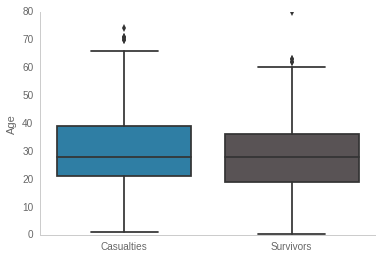

In [90]:
# Boxplot of age distribution in survivors and non-survivors
g = sns.boxplot(x = 'Survived', y = 'Age', data = titanic_q1_df)
g.set(xticklabels = ['Casualties', 'Survivors'])
sns.despine() # Used to improve the plot format
sns.axlabel('', 'Age')

At first sight, it seems that there are not major differences in terms of the ages of the surviving and non-surviving groups. The mean for the surviving group is 28.34 years old, below  the 30.62 years old that is observed for the non-surviving group. However, both groups have a median of 28 years old. Also, it is possible to observe that the age distribution of the survivors is more concentrated on smaller values than for the non-survivors.

After that, I decided to dig a bit deeper and created 3 age groups that could help differentiate more clearly the composition of the survivors and non-survivors. The three groups were:

- Children: individuals who were aged less than 18 years old
- Adults: individuals with ages between 18 and 65 years old
- Elderly: those who were above 65 years old

Those groups were assigned to a new variable (column) called *AgeGroup*:

In [15]:
# Generate groups by age
titanic_q1_df.loc[titanic_q1_df.Age < 18,'AgeGroup'] = 'Children'
titanic_q1_df.loc[(titanic_q1_df.Age >= 18) & (titanic_q1_df.Age < 65),'AgeGroup'] = 'Adults'
titanic_q1_df.loc[titanic_q1_df.Age > 60,'AgeGroup'] = 'Elderly'


Then, using those groups, I calculated their relative frequency within the survivors and non-survivors:

,AgeGroup,Survived,Proportion
0,Adults,Casualties,0.837264
1,Adults,Survivors,0.772414
2,Children,Casualties,0.122642
3,Children,Survivors,0.210345
4,Elderly,Casualties,0.040094
5,Elderly,Survivors,0.017241


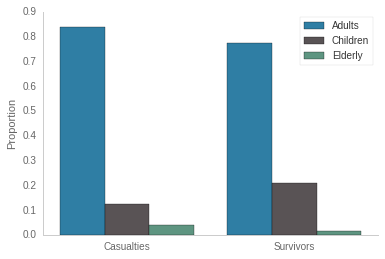

In [108]:
def gen_relfreq(var_1, var_2, norm_axis, data):
    # Function to obtain a dataframe with the relatives frequencies obtained from a cross-tabulation table
    df = pd.crosstab(data[var_1], data[var_2], normalize = norm_axis).stack().to_frame().reset_index()
    df.loc[df.Survived == 1, 'Survived'] = 'Survivors'
    df.loc[df.Survived == 0, 'Survived'] = 'Casualties'
    df = df.rename(columns = {0: 'Proportion'})
    return df

# Obtain relative frequencies of survivors and casualties for each age group
agegroup_ax1_df = gen_relfreq('AgeGroup', 'Survived', 1, titanic_q1_df)

# Graph 
g = sns.barplot(x = 'Survived', y = 'Proportion', hue = 'AgeGroup', data = agegroup_ax1_df)
g.legend(title = '')
sns.axlabel('', 'Proportion')
sns.despine()

# Table of values
agegroup_ax1_df

It can be seen that each age group shows a clearly distinct behavior. The adults (between 18 and 60 years old) represent 83.72% of the casualties but close to 6.5 percentual points less of the group surviving group (77.24%). On the other hand, the children (less than 18 years old) represent 12.26% of the casualties and in the surviving group they represent 21.03% of the total. Finally, the elderly (more than 60 years old) are 4.01% of the casualties and 1.72% of the survivors.

At first sight, one can conclude that children were more likely to survive than the other groups. However, it might be interesting to see if that can be also observed in the proportions of survivors and casualties in each age group. It is possible that only relative to the composition of the age groups children were more likely to survive as it might occur that their survival rate was still less than 50% (meaning that they were more likely to perish than to survive). 

Using a very similar process than for the figure above, the proportions of casualties and survivors relative to each age group were calculated and are shown below:

,AgeGroup,Survived,Proportion
0,Adults,Casualties,0.613126
1,Adults,Survivors,0.386874
2,Children,Casualties,0.460177
3,Children,Survivors,0.539823
4,Elderly,Casualties,0.772727
5,Elderly,Survivors,0.227273


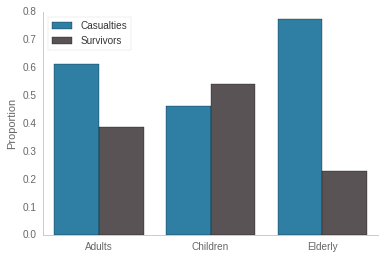

In [102]:
# Same procedure as before, but the relative frequencies are calculated for the in this case
agegroup_ax0_df = gen_relfreq('AgeGroup', 'Survived', 0, titanic_q1_df)

# Graph
g = sns.barplot(x = 'AgeGroup', y = 'Proportion', hue = 'Survived', data = agegroup_ax0_df)
g.legend(title = '', loc = 'best')
sns.axlabel('', 'Proportion')
sns.despine()

# Table of values
agegroup_ax0_df

For the adults and elderly groups, the proportions of survivors and non-survivors just reaffirm the idea that those groups were much more likely to perish than to survive. For the adults, 61.31% perished and for the elderly this percentage was 77.27%. However, in the case of children, a very different picture appears. It occurred that it was more likely to survive than to perish, occurring that 53.98% of them survived. 

The following step was to extend the previous analysis using the gender of the passengers. With that in mind, I first decided to see the composition of the surviving and non-surviving group in terms of sex:

In [105]:
# Generate cross-tab using Survived and Sex variables
pd.crosstab(titanic_q1_df['Survived'], titanic_q1_df['Sex'], normalize = 0)

Sex,female,male
Survived,,
0,0.150943,0.849057
1,0.679310,0.320690


Immediately, it is possible to observe major differences in the proportion of females and males in the considered groups. In terms of the casualties, 15.09% were females and the 84.91% were males. On the contrary, women represented 67.93% of the survivors and males accounted for the remaining 32.07%. With regard to the question we are trying to answer, this shows some clear evidence of sex bias in the compositions of both groups.

After that, I decided to plot the count of survivors and non-survivors, classified by age group and gender:

In [ ]:
# Plot survivors and non-survivors classified by age and gender
sns.factorplot(x = 'AgeGroup', hue = 'Sex', col = 'Survived', col_wrap = 2, data = titanic_q1_df, 
               kind = 'count', size = 4)
sns.despine()

It is possible to see in the above plot that males were predominant in the 3 age groups for the non-surviving group. Up to the point that there were not female casualties in the elderly non-surviving group. By contrast, the survivors are mostly females for the three age groups.

To obtain the exact proportions in each of the groups, I built a cross-tabulation table using the *Survive*, *AgeGroup* and *Sex* variables:

In [106]:
# Generate cross-tab using Survived, Sex and AgeGroup variables
pd.crosstab(titanic_q1_df['Survived'], [titanic_q1_df['Sex'], titanic_q1_df['AgeGroup']], normalize = 1)

Sex         female                        male                    
AgeGroup    Adults  Children Elderly    Adults  Children   Elderly
Survived                                                          
0         0.231527  0.309091     0.0  0.819149  0.603448  0.894737
1         0.768473  0.690909     1.0  0.180851  0.396552  0.105263

For the female adults, children and elderly groups the survival rates were 76.85%, 69.10% and 100% respectively. For men, the survival rates were significative lower. Reaching 18.09%, 39.66% and 10.52% for adults, children, and elderly respectively.

Finally, based on what was observed previously I decided to filter the dataset to match the passengers that were females or children and obtain the survival rate for the women and children group and for adult and elderly males:  

In [ ]:
# Slice dataframe selecting children and women
chfem_df = titanic_q1_df.loc[(titanic_q1_df.AgeGroup == 'Children') | (titanic_q1_df.Sex == 'female')]
# Slice dataframe selecting males
nonchfem_df = titanic_q1_df.loc[titanic_q1_df.Sex == 'male']

print('General survival rate: %.2f%%' % (titanic_q1_df.Survived.mean()*100))
print('Women and children survival rate: %.2f%%' % (chfem_df.Survived.mean()*100))
print('Males survival rate: %.2f%%' % (nonchfem_df.Survived.mean()*100))

## Conclusions

Even though descriptive studies are not very powerful in terms of reaching conclusions. The question that was established at the beginning of this report can be solved:

*Were women and children more likely to survive than males?*

Yes. The survival rate of women and children was 68.97%, much higher than the males survival rate of 20.53% rate. Both of those values are also very different from the survival rate of all the passengers with a reported age value (40.62%). 

On the other hand, when passengers are not divided by age groups there does not seem to be major differences in terms of the age, dividing the groups by in demographic age groups show important changes in the value of the survival rate. So even though the survival rate was highly correlated with being a woman or child that does not mean that being part of those demographic groups was the cause of the higher survival rate. There might be confounding variables that could have also explained that relationship. 

Anyhow, tough luck Jack. It seems like it wasn't a good day to be a male with your demographic characteristics.

<img src="titanic_jack.jpg">



## References

* [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

* [Women and children first](http://www.cam.ac.uk/research/discussion/shipwrecked-women-and-children-first)

